# Álgebra lineal

Alejandro E. Martínez Castro

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. 
Universidad de Granada_

Basado en el cuaderno de Juan Luis Cano
https://github.com/CAChemE/curso-python-cientifico

# Entrada/Salida y Álgebra Lineal

_Una vez hemos visto el manejo básico de arrays en Python con NumPy, es hora de pasar a operaciones más interesantes como son las propias del Álgebra Lineal._

_Los productos escalares y las inversiones de matrices están por todas partes en los programas científicos e ingenieriles, así que vamos a estudiar cómo se realizan en Python._

## Álgebra lineal

Como sabemos, las operaciones del álgebra lineal aparecen con mucha frecuencia a la hora de resolver sistemas de ecuaciones en derivadas parciales y en general al linealizar problemas de todo tipo, y suele ser necesario resolver sistemas con un número enorme de ecuaciones e incógnitas. Gracias a los arrays de NumPy podemos abordar este tipo de cálculos en Python, ya que todas las funciones están escritas en C o Fortran y tenemos la opción de usar bibliotecas optimizadas al límite.

El paquete de álgebra lineal en NumPy se llama `linalg`, así que importando NumPy con la convención habitual podemos acceder a él escribiendo `np.linalg`. Si imprimimos la ayuda del paquete vemos que tenemos funciones para:

* Funciones básicas (norma de un vector, inversa de una matriz, determinante, traza)
* Resolución de sistemas
* Autovalores y autovectores
* Descomposiciones matriciales (QR, SVD)
* Pseudoinversas

In [1]:
import numpy as np

In [2]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    Core Linear Algebra Tools
    -------------------------
    Linear algebra basics:
    
    - norm            Vector or matrix norm
    - inv             Inverse of a square matrix
    - solve           Solve a linear system of equations
    - det             Determinant of a square matrix
    - lstsq           Solve linear least-squares problem
    - pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                      value decomposition
    - matrix_power    Integer power of a square matrix
    
    Eigenvalues and decompositions:
    
    - eig             Eigenvalues and vectors of a square matrix
    - eigh            Eigenvalues and eigenvectors of a Hermitian matrix
    - eigvals         Eigenvalues of a square matrix
    - eigvalsh        Eigenvalues of a Hermitian matrix
    - qr              QR decomposition of a matrix
    - svd             Singular value decomposition 

Recordemos que si queremos usar una función de un paquete pero no queremos escribir la "ruta" completa cada vez, podemos usar la sintaxis `from package import func`:

In [3]:
from numpy.linalg import norm, det
norm

<function numpy.linalg.linalg.norm>

El producto matricial usual (no el que se hace elemento a elemento, sino el del álgebra lineal) se calcula con la misma función que el producto matriz-vector y el producto escalar vector-vector: con la función `dot`, que **no** está en el paquete `linalg` sino directamente en `numpy` y no hace falta importarlo.

In [ ]:
np.dot

Una consideración importante a tener en cuenta es que en NumPy no hace falta ser estricto a la hora de manejar vectores como si fueran matrices columna, siempre que la operación sea consistente. Un vector es una matriz con una sola dimensión: por eso si calculamos su traspuesta no funciona.

In [ ]:
M = np.array([
    [1, 2],
    [3, 4]
])
v = np.array([1, -1])

In [ ]:
v.T

In [ ]:
u = np.dot(M, v)
u

In [ ]:
n = M.dot(v) # Otra forma de aplicar el producto
n

Para hacer comparaciones entre arrays de punto flotante se pueden usar las funciones `np.allclose` y `np.isclose`. La primera comprueba si todos los elementos de los arrays son iguales dentro de una tolerancia, y la segunda compara elemento a elemento y devuelve un array de valores `True` y `False`.

In [ ]:
u, v

In [ ]:
np.allclose(u, v)

In [ ]:
np.isclose(0.0, 1e-8, atol=1e-10)

### Ejercicios

1- Hallar el producto de estas dos matrices y su determinante:

$$\begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 1 \\ -1 & 0 & 1 \end{pmatrix} \begin{pmatrix} 2 & 3 & -1 \\ 0 & -2 & 1 \\ 0 & 0 & 3 \end{pmatrix}$$

In [12]:
from numpy.linalg import det

In [13]:
A = np.array([
    [1, 0, 0],
    [2, 1, 1],
    [-1, 0, 1]
])
B = np.array([
    [2, 3, -1],
    [0, -2, 1],
    [0, 0, 3]
])
print(A)
print(B)

[[ 1  0  0]
 [ 2  1  1]
 [-1  0  1]]
[[ 2  3 -1]
 [ 0 -2  1]
 [ 0  0  3]]


In [14]:
C = np.dot(A, B)
C

array([[ 2,  3, -1],
       [ 4,  4,  2],
       [-2, -3,  4]])

In [15]:
det(C)

-12.0

2- Resolver el siguiente sistema:

$$ \begin{pmatrix} 2 & 0 & 0 \\ -1 & 1 & 0 \\ 3 & 2 & -1 \end{pmatrix} \begin{pmatrix} 1 & 1 & 1 \\ 0 & 1 & 2 \\ 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} -1 \\ 3 \\ 0 \end{pmatrix} $$

In [16]:
M = np.dot(
np.array([
    [2, 0, 0],
    [-1, 1, 0],
    [3, 2, -1]
]),
np.array([
    [1, 1, 1],
    [0, 1, 2],
    [0, 0, 1]
]))
M

array([[ 2,  2,  2],
       [-1,  0,  1],
       [ 3,  5,  6]])

In [17]:
x = np.linalg.solve(M, np.array([-1, 3, 0]))
x

array([ 0.5, -4.5,  3.5])

In [18]:
np.allclose(np.dot(M, x), np.array([-1, 3, 0]))

True

3- Hallar la inversa de la matriz $H$ y comprobar que $H H^{-1} = I$ (recuerda la función `np.eye`)

In [19]:
A = np.arange(1, 37).reshape(6,6)
A[1, 1::2] = 0
A[3, ::2] = 1
A[4, :] += 30
B = (2 ** np.arange(36)).reshape((6,6))
H = A + B
print(H)

[[          2           4           7          12          21          38]
 [         71         128         265         512        1035        2048]
 [       4109        8206       16399       32784       65553      131090]
 [     262145      524308     1048577     2097174     4194305     8388632]
 [   16777271    33554488    67108921   134217786   268435515   536870972]
 [ 1073741855 -2147483616 -2147483615 -2147483614 -2147483613 -2147483612]]


C:\Users\alex\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in power


In [20]:
np.linalg.det(H)

5.130623505831508e+20

In [21]:
Hinv = np.linalg.inv(H)

In [22]:
np.isclose(np.dot(Hinv, H), np.eye(6))

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]], dtype=bool)

In [23]:
np.set_printoptions(precision=3)
print(np.dot(Hinv, H))

[[  1.000e+00  -1.733e-10  -3.466e-10  -6.935e-10  -1.387e-09  -2.772e-09]
 [ -1.455e-11   1.000e+00  -1.164e-10  -2.328e-10  -2.328e-10   0.000e+00]
 [ -2.910e-11   5.821e-11   1.000e+00   2.328e-10   0.000e+00   0.000e+00]
 [ -1.819e-11  -2.910e-11  -7.276e-11   1.000e+00  -2.328e-10  -5.821e-10]
 [  1.137e-11   2.910e-11   3.638e-11  -9.095e-11   1.000e+00   9.022e-10]
 [ -8.413e-12   3.183e-12   1.182e-11   5.821e-11  -2.365e-11   1.000e+00]]


<div class="alert alert-warning">¡No funciona! Y no solo eso sino que los resultados varían de un ordenador a otro.</div>

4- Comprobar el número de condición de la matriz $H$.

In [24]:
np.linalg.cond(H)

9577309398.1132908

<div class="alert alert-warning">La matriz está mal condicionada.</div>

## Entrada/Salida

Con E/S (I/O en inglés) entendemos leer y escribir datos archivos. Es algo que necesitaremos hacer con relativa frecuencia, y en NumPy es muy sencillo de hacer. Para el caso de la **lectura** se usa la función `np.loadtxt`.

Para practicar, vamos a leer el archivo `temperaturas.csv` que contiene datos diarios de temperaturas en Nueva York entre el 1 de enero de 2013 y el 1 de enero de 2014, obtenidos gratuitamente de http://ncdc.noaa.gov/. Como los hemos descargado en formato CSV habrá que tener algunas precauciones a la hora de leer el archivo.

In [25]:
datos = np.loadtxt("temperaturas.csv",
                   skiprows=1,  # Saltamos una línea
                   usecols=(1, 2, 3),  # Solo columnas 2, 3 y 4
                   delimiter=',')  # Separados por comas

In [26]:
datos[:9]

array([[  2.013e+07,   4.400e+01,  -3.300e+01],
       [  2.013e+07,   6.000e+00,  -5.600e+01],
       [  2.013e+07,   0.000e+00,  -4.400e+01],
       [  2.013e+07,   2.800e+01,  -1.100e+01],
       [  2.013e+07,   5.600e+01,   0.000e+00],
       [  2.013e+07,   7.800e+01,   1.100e+01],
       [  2.013e+07,   7.200e+01,   2.800e+01],
       [  2.013e+07,   8.900e+01,   1.700e+01],
       [  2.013e+07,   9.400e+01,   3.900e+01]])

La primera columna es un entero con formato "AAAAMMDD" que vamos a ignorar. Las temperaturas están medidas en décimas de grado Celsius, así que hay que pasarlas a grados Celsius. Vamos a calcular también la temperatura media.

In [27]:
Tmax = datos[:, 1] / 10
Tmin = datos[:, 2] / 10
Tavg = (Tmax + Tmin) / 2

Como vamos a ignorar la columna de las fechas tenemos que crear un dominio para el eje x. Simplemente construiremos un array de enteros desde 0 hasta 365.

In [28]:
x = np.arange(366)

### Ejercicio

Y ahora representamos la evolución de la temperatura media (por ejemplo de color negro), indicando "Daily summaries" en el título, "Days" en el eje x y "Temperature (C)" en el eje y, usando la interfaz orientada a objetos de matplotlib (función `plt.subplots`). Podemos crear una zona rellena entre la máxima y la mínima con la función `fill_between(x, max, min)` (por ejemplo de color #4f88b1). Si los límites del eje x no quedan como queremos podemos usar la función `set_xlim(xmin, xmax)`.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

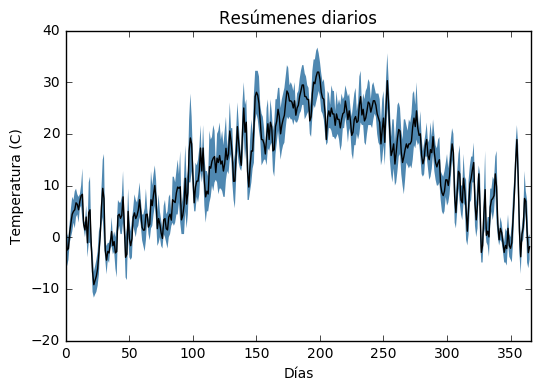

In [30]:
fig, ax = plt.subplots()

ax.plot(x, Tavg, 'k')
ax.set_xlim(0, 366)
ax.fill_between(x, Tmin, Tmax, facecolor='#4f88b1', edgecolor='none')
ax.set_title("Resúmenes diarios".decode('utf-8'))
ax.set_xlabel("Días".decode('utf-8'))
ax.set_ylabel("Temperatura (C)")